In [ ]:
from data_provider.data_loader import Dataset_flame

class Args:
    n_fold = 0
    seq_len = 5
    pred_len = 20

dataset = Dataset_flame(Args())
dataset.__getitem__(200)

In [ ]:
from models.UNetViT import Model
import torch

class Configs:
    seq_len = 5
    pred_len = 20
    enc_in = 5
    c_out = 1
    dropout = 0.1
    scale = 1

model = Model(Configs())
x = torch.rand(2, 5, 5, 113, 32)
pred = model(x)

In [ ]:
pred.shape

In [ ]:
from data_provider.data_loader import Dataset_flame
import numpy as np

x = np.random.rand(4, 5, 6)
y = Dataset_flame.__cal_total_mean__(x)
y.shape

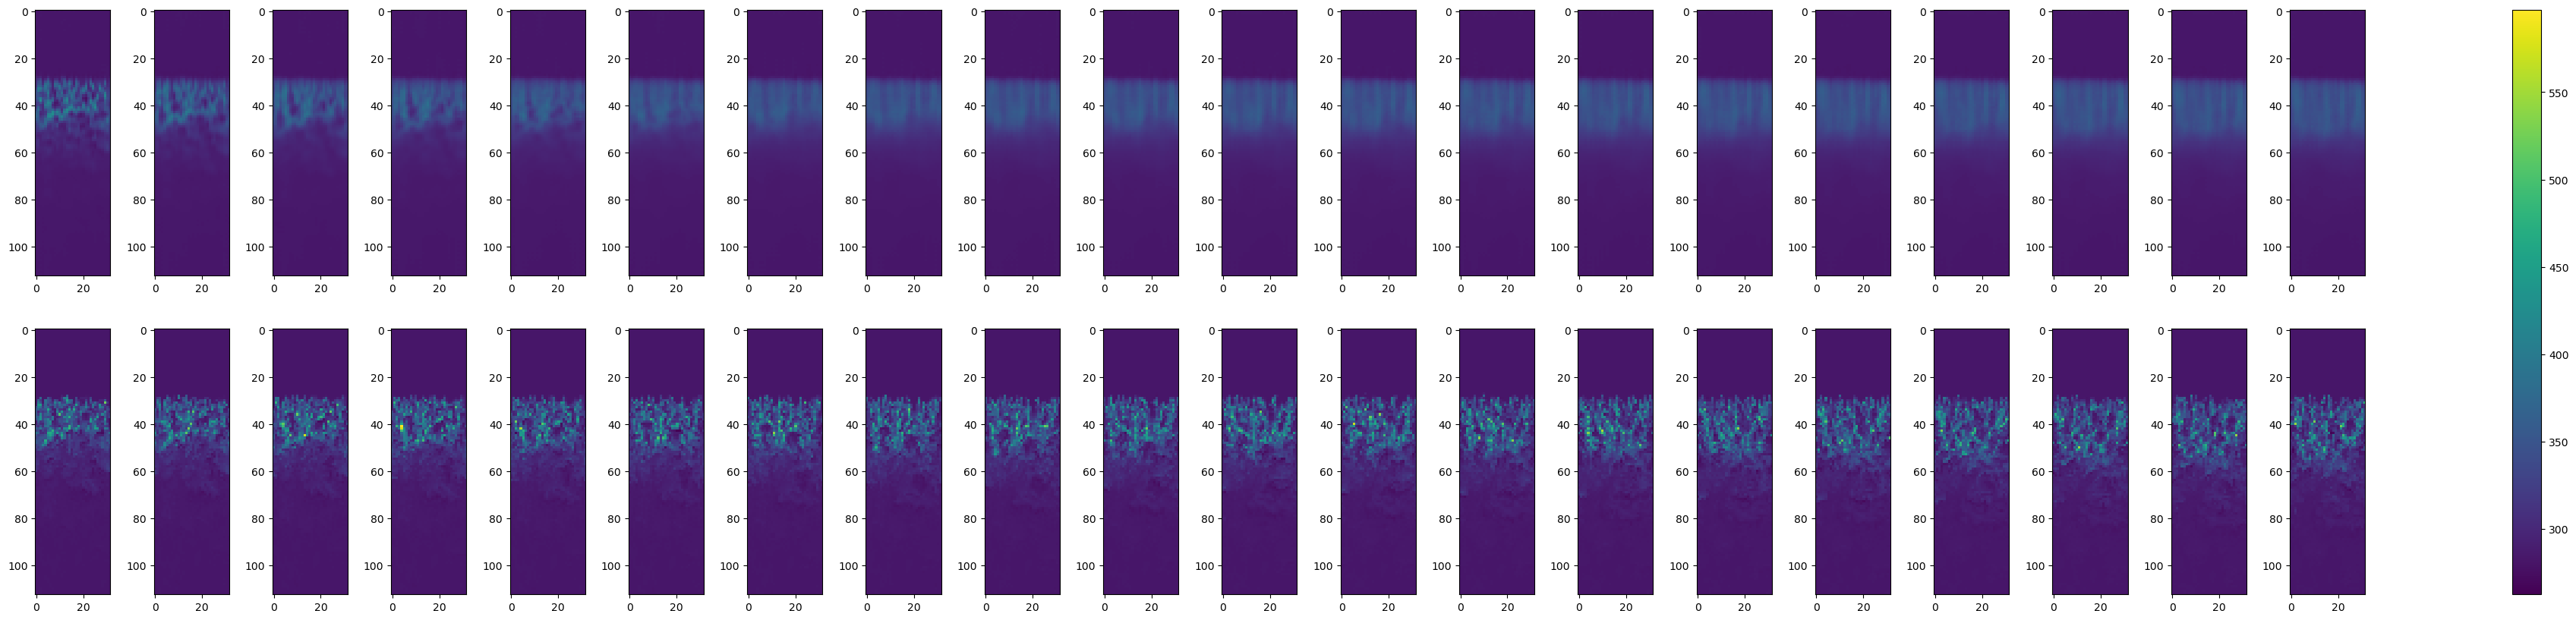

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from matplotlib import colors

scaler = load('dataset/feature_scaler.joblib')
scaler = scaler['ustar']

pred = np.load('results/flame_enc_in_23_target_ustar_UNet_FLAME_ftM_sl5_ll48_pl20_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc1_ebtimeF_dtTrue_Exp_0nf0_we3/pred.npy')
pred = pred * scaler.scale_ + scaler.mean_
true = np.load('results/flame_enc_in_23_target_ustar_UNet_FLAME_ftM_sl5_ll48_pl20_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc1_ebtimeF_dtTrue_Exp_0nf0_we3/true.npy')
true = true * scaler.scale_ + scaler.mean_

fig, axes = plt.subplots(2, 20, figsize=(50, 10))
index = 100

vmin = min(np.min(pred[index]), np.min(true[index]))
vmax = max(np.max(pred[index]), np.max(true[index]))
norm = colors.Normalize(vmin=vmin, vmax=vmax)

for i, ax in enumerate(axes[0]):
    im = ax.imshow(pred[index][i], norm=norm)
    # fig.colorbar(im, ax=ax)

for i, ax in enumerate(axes[1]):
    im = ax.imshow(true[index][i], norm=norm)

fig.colorbar(im, ax=axes)

# plt.tight_layout()
plt.show()